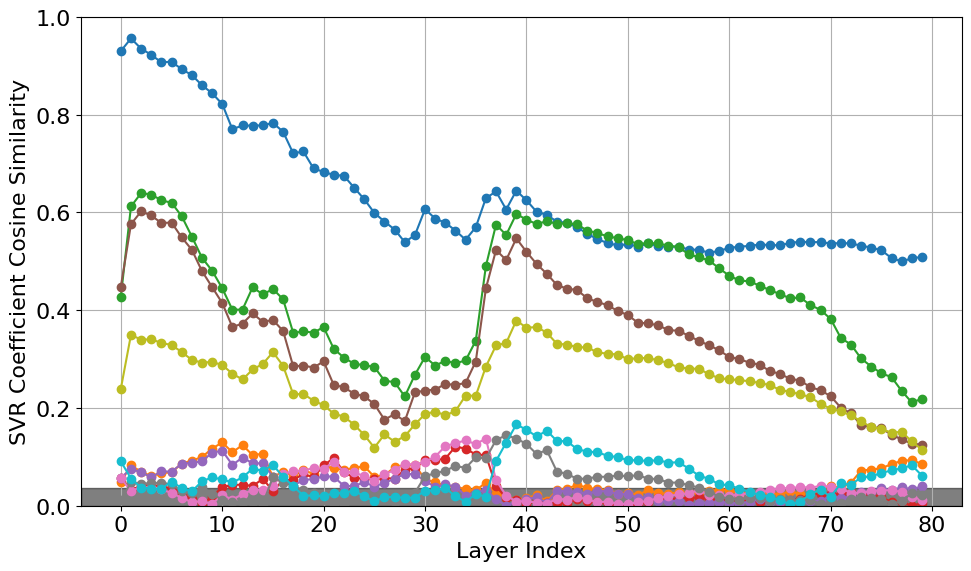

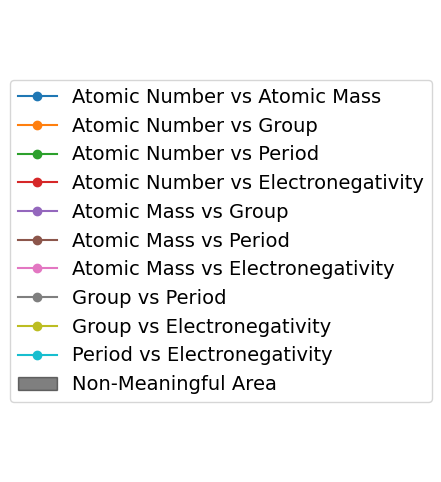

Main plot saved at Results/cosine_similarity/main_plot_Meta-Llama-3.1-70B.png
Legend figure saved at Results/cosine_similarity/legend_Meta-Llama-3.1-70B.png


In [2]:
import json
import os
from typing import Dict, List
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'legend.fontsize': 14
})

cosine_diff_file_path = '../Results/cosine_distance/data/cosine_distances.json'
with open(cosine_diff_file_path, 'r') as f:
    cosine_diff_dict = json.load(f)
for feature, distances in cosine_diff_dict.items():
    similarities = [abs(1 - d) for d in distances]
    cosine_diff_dict[feature] = similarities

num_layers = len(next(iter(cosine_diff_dict.values())))
model_name = 'Meta-Llama-3.1-70B'

def plot_feature_cosine_similarity_differences(data: Dict[str, List[float]], layers_count: int, name: str,
                                               output_dir: str = 'Results/cosine_similarity'):
    os.makedirs(output_dir, exist_ok=True)
    
    # Main figure
    fig, ax = plt.subplots(figsize=(10, 6))
    layers = np.arange(layers_count)
    for feature, similarity_diffs in data.items():
        ax.plot(layers, similarity_diffs, marker='o', label=feature)
    ax.axhspan(0, 0.0364, color='black', alpha=0.5, label='Non-Meaningful Area')  # Darker grey
    ax.set_xlabel('Layer Index')
    ax.set_ylabel('SVR Coefficient Cosine Similarity')
    # ax.set_title(f'Cosine Similarity Differences - {name}')
    ax.set_ylim(0, 1.0)
    ax.grid(True)
    
    # Capture legend info, then remove from main plot
    handles, labels = ax.get_legend_handles_labels()
    ax.legend().remove()
    
    fig.tight_layout()
    main_output_path = os.path.join(output_dir, f'main_plot_{name}.png')
    fig.savefig(main_output_path)
    plt.show()
    
    # Figure for legend
    fig_leg, ax_leg = plt.subplots(figsize=(4, 6))
    ax_leg.legend(handles, labels, loc='center', ncol=1)
    ax_leg.axis('off')
    
    legend_output_path = os.path.join(output_dir, f'legend_{name}.png')
    fig_leg.savefig(legend_output_path)
    plt.show()
    
    print(f"Main plot saved at {main_output_path}")
    print(f"Legend figure saved at {legend_output_path}")

plot_feature_cosine_similarity_differences(cosine_diff_dict, num_layers, model_name)